# Times University ranking dataset analysis

In this codealong we are going to analyze a ranking of universities using regression. Specifically, we are going to **predict the university ranking** with the provided predictors.

---

The information provided in the csv contains:

- **world_rank** - world rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250).
- **university_name** - name of university.
- **country** - country of each university.
- **teaching** - university score for teaching (the learning environment).
- **international** - university score international outlook (staff, students, research).
- **research** - university score for research (volume, income and reputation).
- **citations** - university score for citations (research influence).
- **income** - university score for industry income (knowledge transfer).
- **total_score** - total score for university, used to determine rank.
- **num_students** - number of students at the university.
- **student_staff_ratio** - Number of students divided by number of staff.
- **international_students** - Percentage of students who are international.
- **female_male_ratio** - Female student to Male student ratio.
- **year** - year of the ranking (2011 to 2016 included).

We are going to predict the **total score**, which directly corresponds to the ranking.

---

### ONLY THE DATA PATH IS PROVIDED!

The analysis is up to you. This is an open ended practice. You are expected to:

- Load the packages you need to do analysis
- Perform EDA on variables of interest
- Form a hypothesis or hypotheses on what is important for the score
- Check your data for problems, clean and munge data into correct formats
- Create new variables from columns if necessary
- Perform statistical analysis with regression and describe the results

---

If you do not know how to do something **check documentation first.** I look up things in documentation all the time. 

**You are not expected to know how to do things by heart. Knowing how to effectively look up the answers on the internet is a critical skill for data scientists!**

In [31]:
uni_data_path = './dataset/timesData.csv'

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [33]:
unidata = pd.read_csv(uni_data_path, na_values='-')

In [34]:
unidata.head(1)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011


In [35]:
unidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2594 non-null float64
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2385 non-null float64
total_score               1201 non-null float64
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2367 non-null object
year                      2603 non-null int64
dtypes: float64(7), int64(1), object(6)
memory usage: 284.8+ KB


In [36]:
# unidata["total_score"] = pd.to_numeric(unidata["total_score"].str.replace('-', ''), errors='coerce')
# unidata["income"] = pd.to_numeric(unidata["income"].str.replace('-', ''), errors='coerce')

In [37]:
unidata["num_students"] = unidata["num_students"].str.replace(',','').astype(float)

In [38]:
unidata["female_male_ratio"] = unidata["female_male_ratio"].str.split(' : ', expand=True)[0].astype(float) / 100.0

In [39]:
unidata["international_students"] = unidata["international_students"].str.replace('%','').astype(float) / 100.0

In [41]:
unidata.dropna(inplace=True)

unidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 1 to 2002
Data columns (total 14 columns):
world_rank                954 non-null object
university_name           954 non-null object
country                   954 non-null object
teaching                  954 non-null float64
international             954 non-null float64
research                  954 non-null float64
citations                 954 non-null float64
income                    954 non-null float64
total_score               954 non-null float64
num_students              954 non-null float64
student_staff_ratio       954 non-null float64
international_students    954 non-null float64
female_male_ratio         954 non-null float64
year                      954 non-null int64
dtypes: float64(10), int64(1), object(3)
memory usage: 111.8+ KB


In [43]:
exclude = ['world_rank', 'university_name', 'country', 'total_score']
y = unidata['total_score']
X = unidata[[col for col in unidata.columns if col not in exclude]]

In [45]:
from sklearn import cross_validation, linear_model, metrics

In [46]:
cross_validation.cross_val_score(linear_model.LinearRegression(), X, y, cv=5)

/Users/pizzato/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


array([ 0.99758245,  0.99979173,  0.99986483,  0.9999162 ,  0.99977329])

In [47]:
lm = linear_model.LinearRegression().fit(X, y)
zip(X.columns, lm.coef_)

[('teaching', 0.29907973708719454),
 ('international', 0.069710997658992566),
 ('research', 0.30094857477469505),
 ('citations', 0.30348121020814672),
 ('income', 0.025548318036536316),
 ('num_students', 3.0799112572788521e-07),
 ('student_staff_ratio', 0.00039930346566680042),
 ('international_students', 0.25684251080126969),
 ('female_male_ratio', 0.06864273088982531),
 ('year', -0.04150609706016941)]

In [48]:
cross_validation.cross_val_score(linear_model.LassoCV(), X, y, cv=5)

array([ 0.99377021,  0.99978904,  0.99932214,  0.99987752,  0.9998866 ])

In [49]:
lm = linear_model.LassoCV().fit(X, y)
zip(X.columns, lm.coef_)

[('teaching', 0.29017054718223834),
 ('international', 0.064777349407206128),
 ('research', 0.3071342615709326),
 ('citations', 0.29382323247872166),
 ('income', 0.020346664894349092),
 ('num_students', -4.7716990890085177e-06),
 ('student_staff_ratio', -0.0),
 ('international_students', 0.0),
 ('female_male_ratio', -0.0),
 ('year', -0.0)]

# Classification

In [50]:
unidata['world_rank'] = unidata['world_rank'].str.replace('=','').str.split('-', expand=True)[0].astype(int)

In [51]:
exclude = ['world_rank', 'university_name', 'country', 'total_score']
y = unidata['world_rank'] < 100
X = unidata[[col for col in unidata.columns if col not in exclude]]

In [52]:
cross_validation.cross_val_score(linear_model.LogisticRegression(), X, y, cv=5)

array([ 0.98958333,  0.91099476,  0.97382199,  0.91578947,  0.82631579])

In [53]:
y_pred = cross_validation.cross_val_predict(linear_model.LogisticRegression(), X, y, cv=5)

In [54]:
metrics.confusion_matrix(y_true=y, y_pred=y_pred)

array([[460,  36],
       [ 37, 421]])

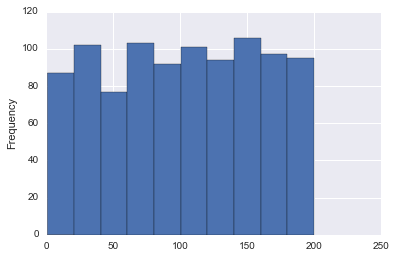

In [56]:
unidata['world_rank'].plot.hist()

In [57]:
unidata['world_rank']

1         2
2         3
3         4
5         6
6         6
8         9
12       13
13       14
15       15
18       19
19       20
20       21
21       22
22       23
23       24
26       27
27       28
28       29
29       30
30       30
31       32
33       34
35       36
39       40
41       42
44       43
46       47
47       48
50       51
53       54
       ... 
1970    167
1971    167
1972    167
1973    167
1974    172
1975    172
1976    174
1977    175
1978    176
1980    178
1981    179
1983    180
1984    182
1985    182
1986    182
1987    185
1988    185
1989    185
1991    189
1992    190
1993    190
1994    192
1995    193
1996    193
1997    195
1998    196
1999    196
2000    198
2001    199
2002    200
Name: world_rank, dtype: int64